# Assessing promotion impact on competitors using A/B testing

In this project we will conduct an A/B test to assess the impact of a promotions on the frequency of price reductions of competitors. This information can help the company better understand their competitive landscape, adjust their pricing strategies accordingly, and optimize their marketing efforts and resources.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import timedelta

from scipy.stats import shapiro
from scipy import stats

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
readRDS = robjects.r['readRDS']

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Set the desired inputs
categories = ["pasta","toilet paper"]

# We choose two stores located in the same street as competitors
store1 = '1049' #Osher-Ad
store2 = '1342' #Rami-Levi

# We choose period length to be assessed (in days)
period = 7

alpha=0.05

In [3]:
# Import promotion category data
promotion_category = pd.read_excel('promotion_id.xlsx')

promotion_data = pd.DataFrame()
for category in categories:
    category_promotion_data = pd.read_excel('promotion_id.xlsx', sheet_name=category)
    category_promotion_data['PromotionDescription'] = category_promotion_data['PromotionDescription'].astype('str')
    category_promotion_data = pd.merge(category_promotion_data, promotion_category, on="PromotionID")
    category_promotion_data.columns = ['DiscountDescription','PromotionID','PromotionType']
    promotion_data = pd.concat([promotion_data, category_promotion_data], axis=0)

In [4]:
def data_importing_preprocessing(categories, store, promotion_data):
    store_data = pd.DataFrame()

    for category in categories:
        category_store_data = readRDS('G:/retail data/rds data/data by store/'+category+'/'+str(store)+'.rds')
        category_store_data = pandas2ri.rpy2py_dataframe(category_store_data)
        category_store_data['Date'] = pd.to_datetime(category_store_data['Date'], utc=True, unit='d').apply(lambda x: x.strftime('%Y-%m-%d'))
        category_store_data['Date'] = pd.to_datetime(category_store_data['Date'], errors='coerce').sort_values()
        category_store_data['DiscountDescription'] = category_store_data['DiscountDescription'].str.replace('\n', '')
        category_store_data = pd.merge(category_store_data, promotion_data, how='left', on="DiscountDescription")
        category_store_data['category'] = category
        store_data = pd.concat([store_data, category_store_data], axis=0)
        
    return store_data

In [5]:
# Import the data of store with the promotions
store1_data = data_importing_preprocessing(categories, store1, promotion_data)
store1_data[:5]

,Barcode,ProductDescription,Manufacturer,Category,ChainID,ChainName,SubChainID,SubChainName,StoreID,StoreName,Price,Discount,FinalPrice,DiscountDescription,DiscountID,PriceSetDate,Date,PromotionID,PromotionType,category
0,7290012929793,ספגטי מחיטה מלאה פרווה טעמן 500 גרם,טעמן,פסטה ספגטי ולזניה,11.0,אושר עד,11.0,אושר עד,1049,ירושלים גבעת שאול,4.4,None,4.4,None,None,2015-07-21 08:41:10,2016-01-01,NaN,NaN,pasta
1,7290005437939,ספגטיני מספר 10 טעמן 500 גרם,טעמן,פסטה ספגטי ולזניה,11.0,אושר עד,11.0,אושר עד,1049,ירושלים גבעת שאול,3.5,None,3.5,None,0,2015-10-09 08:40:33,2016-01-01,NaN,NaN,pasta
2,8076800195033,ספגטיני מספר 3 ברילה 500 גרם,ש. שסטוביץ - ברילה,פסטה ספגטי ולזניה,11.0,אושר עד,11.0,אושר עד,1049,ירושלים גבעת שאול,4.9,None,4.9,None,None,2015-10-18 20:24:11,2016-01-01,NaN,NaN,pasta
3,8076809512268,פסטה גירנדולה מספר 34 ברילה 500 גרם,ש. שסטוביץ - ברילה,פסטה ספגטי ולזניה,11.0,אושר עד,11.0,אושר עד,1049,ירושלים גבעת שאול,4.9,None,4.9,None,None,2015-10-23 08:40:59,2016-01-01,NaN,NaN,pasta
4,8076809523738,פסטה לזניה ברילה 500 גרם,ש. שסטוביץ - ברילה,פסטה ספגטי ולזניה,11.0,אושר עד,11.0,אושר עד,1049,ירושלים גבעת שאול,19.9,None,19.9,None,None,2015-06-17 08:32:38,2016-01-01,NaN,NaN,pasta


In [6]:
# Import the data of the competitive store
store2_data = data_importing_preprocessing(categories, store2, promotion_data)
store2_data[:5]

,Barcode,ProductDescription,Manufacturer,Category,ChainID,ChainName,SubChainID,SubChainName,StoreID,StoreName,Price,Discount,FinalPrice,DiscountDescription,DiscountID,PriceSetDate,Date,PromotionID,PromotionType,category
0,8007290137241,לזניה איטלקית וילי פוד 500 גרם,וילי פוד,פסטה ספגטי ולזניה,19.0,רמי לוי,26.0,רמי לוי,1342,גבעת שאול,8.9,None,8.9,None,None,2015-02-21 10:27:26,2016-01-01,NaN,NaN,pasta
1,7290000060316,ספגטי 8 פרפקטו אסם 500 גרם,אסם,פסטה ספגטי ולזניה,19.0,רמי לוי,26.0,רמי לוי,1342,גבעת שאול,7.5,None,7.5,None,None,2015-10-06 02:21:26,2016-01-01,NaN,NaN,pasta
2,8076800315097,ספגטי בוקטיני מספר 9 ברילה 500 גרם,ש. שסטוביץ - ברילה,פסטה ספגטי ולזניה,19.0,רמי לוי,26.0,רמי לוי,1342,גבעת שאול,5.9,None,5.9,None,None,2015-12-29 02:27:37,2016-01-01,NaN,NaN,pasta
3,8076800195019,ספגטי מספר 1 קפליני ברילה 500 גרם,ש. שסטוביץ - ברילה,פסטה ספגטי ולזניה,19.0,רמי לוי,26.0,רמי לוי,1342,גבעת שאול,5.9,None,5.9,None,None,2015-12-29 02:27:37,2016-01-01,NaN,NaN,pasta
4,7290000060323,ספגטיני פרפקטו אסם 500 גרם,אסם,פסטה ספגטי ולזניה,19.0,רמי לוי,26.0,רמי לוי,1342,גבעת שאול,7.5,None,7.5,None,None,2015-10-06 02:21:27,2016-01-01,NaN,NaN,pasta


### EDA

In [7]:
def store_price_change_fun(store_data):
    
    # Get a list of all unique product descriptions
    products = store_data['ProductDescription'].unique()
    product_list = []
    for product in products:
        product_data = store_data[store_data['ProductDescription'] == product]
        product_data = product_data.sort_values(by='Date')
        # Compute the price changes
        product_data['PreviousPrice'] = product_data['FinalPrice'].shift(1)
        product_data['PriceChange'] = product_data['FinalPrice'] - product_data['PreviousPrice']
        product_list.append(product_data)
        
    product_data = pd.concat(product_list)
    product_data= product_data.reset_index(drop=True)
    
    return product_data

store1_price_changes = store_price_change_fun(store1_data)
store2_price_changes = store_price_change_fun(store2_data)

store1_price_changes['PriceChange'] = store1_price_changes['PriceChange'].replace(0, np.nan)
store2_price_changes['PriceChange'] = store2_price_changes['PriceChange'].replace(0, np.nan)

store1_price_changes['PriceDecrease'] = np.where(store1_price_changes['PriceChange'] < 0, store1_price_changes['PriceChange'], np.nan)
store2_price_changes['PriceDecrease'] = np.where(store2_price_changes['PriceChange'] < 0, store2_price_changes['PriceChange'], np.nan)

##### Frequency of price changes

We will explore the distribution of price changes to compare the price changes between the stores in order to determine if there are any differences in the behavior of the stores, which could impact the results of the A/B testing. Moreover, checking for a relationship between the date and price changes is also essential as it could provide insight into potential correlations between the date and the change in price.

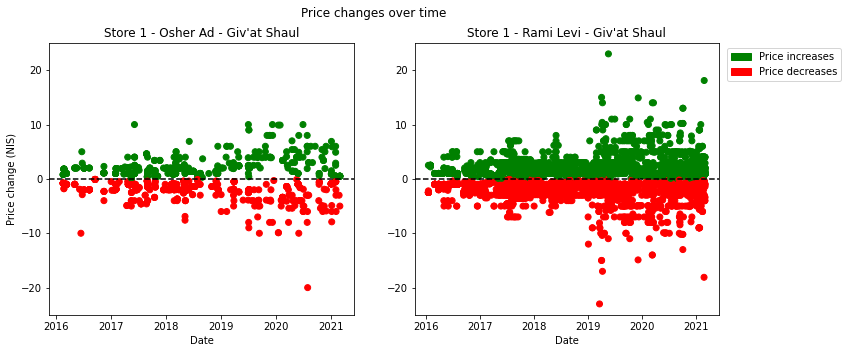

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot for store 1 price changes
x1 = store1_price_changes['Date']
y1 = store1_price_changes['PriceChange']
colors1 = np.where(y1>0,'green','red')
ax1.scatter(x1, y1, c=colors1)
ax1.axhline(0, color='black', linestyle='--', label='Zero line')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price change (NIS)')
ax1.set_title("Store 1 - Osher Ad - Giv'at Shaul")


# Subplot for store 2 price changes
x2 = store2_price_changes['Date']
y2 = store2_price_changes['PriceChange']
colors2 = np.where(y2>0,'green','red')
ax2.scatter(x2, y2, c=colors2)
ax2.axhline(0, color='black', linestyle='--', label='Zero line')
ax2.set_xlabel('Date')
ax2.set_title("Store 1 - Rami Levi - Giv'at Shaul")

increase_legend = mpatches.Patch(color='green', label='Price increases')
decrease_legend = mpatches.Patch(color='red', label='Price decreases')
ax2.legend(handles=[increase_legend, decrease_legend], loc='best', bbox_to_anchor=(1.01, 1))

ax1.set_ylim(-25, 25)
ax2.set_ylim(-25, 25)

plt.suptitle("Price changes over time")
plt.show()

We see that the price change tend to be slightly greater in the recent years. While the number of observations in Rami Levi store is greater, the distribution of price changes between the two stores is relatively similar, with Rami Levi store exhibiting slightly more outliers.

##### Frequency of promotions

We will also investigate the promotions as part of the price decreases. This helps in identifying if there is a higher frequency of price decreases due to promotions during certain times of the year in one of the stores.

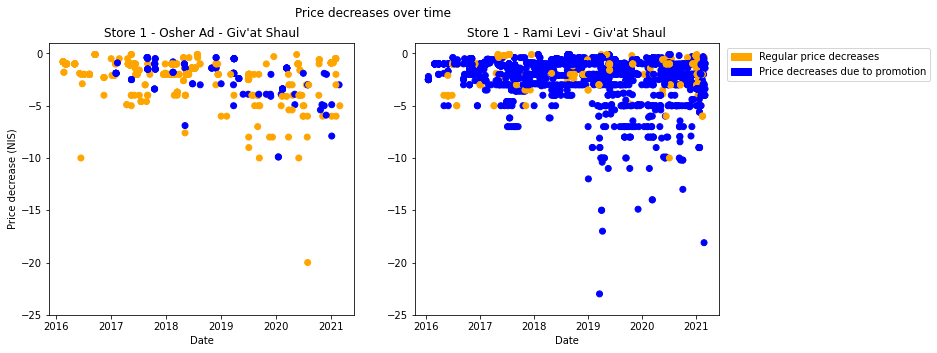

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot for store 1 price changes
x1 = store1_price_changes['Date']
y1 = store1_price_changes['PriceDecrease']
colors1 = np.where(~store1_price_changes['DiscountDescription'].isna(), 'blue', 'orange')
ax1.scatter(x1, y1, c=colors1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price decrease (NIS)')
ax1.set_title("Store 1 - Osher Ad - Giv'at Shaul")

# Subplot for store 2 price changes
x2 = store2_price_changes['Date']
y2 = store2_price_changes['PriceDecrease']
colors2 = np.where(~store2_price_changes['DiscountDescription'].isna(), 'blue', 'orange')
ax2.scatter(x2, y2, c=colors2)
ax2.set_xlabel('Date')
ax2.set_title("Store 1 - Rami Levi - Giv'at Shaul")

regular_legend = mpatches.Patch(color='orange', label='Regular price decreases')
promotion_legend = mpatches.Patch(color='blue', label='Price decreases due to promotion')
ax2.legend(handles=[regular_legend, promotion_legend], loc='best', bbox_to_anchor=(1.01, 1))

ax1.set_ylim(-25, 1)
ax2.set_ylim(-25, 1)

plt.suptitle("Price decreases over time")
plt.show()

We observe that in the Rami Levi store, the size of promotions tends to be greater compared to the normal price reductions. However, in the Osher Ad store, there is no substantial difference.

##### Distribution of promotions

We will examine the distribution of promotions between the two stores.

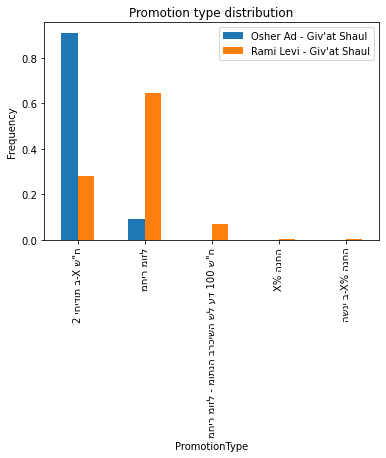

In [10]:
promo_freq1 = pd.DataFrame(store1_price_changes['PromotionType'].value_counts()/store1_price_changes['PromotionType'].value_counts().sum()).reset_index()
promo_freq1.columns = ['PromotionType',"Osher Ad - Giv'at Shaul"]
promo_freq2 = pd.DataFrame(store2_price_changes['PromotionType'].value_counts()/store2_price_changes['PromotionType'].value_counts().sum()).reset_index()
promo_freq2.columns = ['PromotionType',"Rami Levi - Giv'at Shaul"]
promo_freq = pd.merge(promo_freq1, promo_freq2, on="PromotionType", how='outer').set_index('PromotionType')

promo_freq.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title("Promotion type distribution")
plt.show()

We see that the store of Osher Ad tends to use different types of promotions than the store of Rami Levi. We will check the influences of these promotions.

#### Data preparation

We use in A/B testing to determine the effect of a promotion on the price changes of a competing store. To do this, we define treatment group as follows:
- Treatment group - is the change in the frequency of price changes in the competitor store for the same products before and after the promotion in the first store.

We then compare the treatment group with two control groups:
- Control group (type 1) - is the change in the frequency of price changes in the competitor store for different products but at the same time before and after the promotion in the first store.
- Control group (type 2) - is the change in the frequency of price changes in the competitor store for the same products, but at different time periods than the promotions in the first store.

By comparing the treatment group to these two control groups, we can determine if the changes in the competitor store are truly due to the promotion or if they are due to other factors such as different time or different products.We use in A/B testing to determine the effect of a promotion on the price changes of a competing store. To do this, we define treatment group as follows:
- Treatment group - is the change in the frequency of price changes in the competitor store for the same products before and after the promotion in the first store.

We then compare the treatment group with two control groups:
- Control group (type 1) - is the change in the frequency of price changes in the competitor store for different products but at the same time before and after the promotion in the first store.
- Control group (type 2) - is the change in the frequency of price changes in the competitor store for the same products, but at different time periods than the promotions in the first store.

By comparing the treatment group to these two control groups, we can determine if the changes in the competitor store are truly due to the promotion or if they are due to other factors such as different time or different products.

In [11]:
# function to find continuous_periods in price time series to create control group of identical products to treatment but different times
def continuous_periods(data, n):
    periods = []
    start, end = 0, 0
    for i in range(1,len(data)):
        #print(data['PriceChange'])
        if data['PriceChange'][i] == 0:
            end = i
            if end - start == n-1:
                periods.append((start, end))
                start = i+1
                end = i+1
        else:
            start = i+1
            end = i+1
    for i in range(len(periods)):
        periods[i] = (periods[i][0]+1, periods[i][1]+1)
    median_order = [(x[0]+x[1]+1)/2 for x in periods]
    return median_order

In [12]:
def data_preparation(store_data, store2_data, period, group):
    
    # Get a list of all unique product descriptions
    products = store_data['ProductDescription'].unique()
    
    product_list = []
    for product in products:
        product_data = store_data[store_data['ProductDescription'] == product]
        product_data = product_data.sort_values(by='Date')
        # Compute the price changes
        product_data['PreviousPrice'] = product_data['FinalPrice'].shift(1)
        product_data['PriceChange'] = product_data['FinalPrice'] - product_data['PreviousPrice']
        
        if group=='treatment':
            # Keep just the price changes
            changed_prices = product_data[product_data['PriceChange'] != 0]
            changed_prices = changed_prices[changed_prices['PriceChange'].isnull() != True]
            product_list.append(changed_prices)
        elif group=='control_same_time':
            # Keep just the price that did not changed
            non_changed_prices = product_data[product_data['PriceChange'] == 0]
            non_changed_prices = non_changed_prices[non_changed_prices['PriceChange'].isnull() != True]
            product_list.append(non_changed_prices)
        elif group=='control_same_product':
            product_data = product_data.reset_index(drop=True)
            non_price_change_middle_periods = continuous_periods(product_data, period*2)
            filtered_product_data = product_data.iloc[non_price_change_middle_periods]
            product_list.append(filtered_product_data)
        
    product_data = pd.concat(product_list)
    
    if group=='treatment':
        # Taking just price changes due to promotions
        product_data = product_data[product_data['PromotionType'].isnull() != True]
    
    # Taking products that also exist the the store 2
    store2_products = set(store2_data['ProductDescription'])
    product_data = product_data[product_data['ProductDescription'].isin(store2_products)]
    # Filter out observations before the minimum to test
    start_date = pd.to_datetime("2019-01-01") + timedelta(days=period)
    product_data = product_data[product_data['Date'] >= start_date]
    
    return product_data

In [13]:
def adding_competitive_data(treatment_control_data, store2_data, period):
    treatment_control_data['Competitive_Num_Reductions_Before'] = 0
    treatment_control_data['Competitive_Num_Reductions_After'] = 0

    # add number of price reductions in store 2 before and after the treatment or the placebo in store 1
    for product in range(len(treatment_control_data)):
        product_in_store2 = store2_data[store2_data['ProductDescription'] == treatment_control_data['ProductDescription'][product]]

        before_treatment_control_store2 = product_in_store2[(product_in_store2['Date'] < treatment_control_data['Date'][product]) & (product_in_store2['Date'] >= (treatment_control_data['Date'][product] - timedelta(days=period)))]
        before_treatment_control_store2.loc[:, 'PreviousPrice'] = before_treatment_control_store2['FinalPrice'].shift(1)
        before_treatment_control_store2['PriceChange'] = before_treatment_control_store2['FinalPrice'] - before_treatment_control_store2['PreviousPrice']
        before_treatment_control_store2['PriceReduction'] = np.where(before_treatment_control_store2['PriceChange'] < 0, 1, 0)
        treatment_control_data['Competitive_Num_Reductions_Before'][product] = before_treatment_control_store2['PriceReduction'].sum()
    
        after_treatment_control_store2 = product_in_store2[(product_in_store2['Date'] >= treatment_control_data['Date'][product]) & (product_in_store2['Date'] < (treatment_control_data['Date'][product] + timedelta(days=period)))]
        after_treatment_control_store2.loc[:, 'PreviousPrice'] = after_treatment_control_store2['FinalPrice'].shift(1)
        after_treatment_control_store2['PriceChange'] = after_treatment_control_store2['FinalPrice'] - after_treatment_control_store2['PreviousPrice']
        after_treatment_control_store2['PriceReduction'] = np.where(after_treatment_control_store2['PriceChange'] < 0, 1, 0)
        treatment_control_data['Competitive_Num_Reductions_After'][product] = after_treatment_control_store2['PriceReduction'].sum()

    treatment_control_data['Competitive_Diff_Before_After'] = treatment_control_data['Competitive_Num_Reductions_After'] - treatment_control_data['Competitive_Num_Reductions_Before']
    
    return treatment_control_data

In [ ]:
#### treatment data

# Get the data on the price changes that occurred in store 1 due to promotions
changed_prices_data = data_preparation(store1_data, store2_data, period,'treatment')
# Get a list of the promotion categories that we will test
promotion_type_detected = pd.DataFrame(changed_prices_data['PromotionType'].unique(), columns=['PromotionType'])

# Select the first promotion type and gather data on the price reductions in store 2
treatment_i = changed_prices_data[changed_prices_data['PromotionType']==promotion_type_detected['PromotionType'][0]].reset_index(drop=True)

# Add the number of price reductions in store 2 before and after the promotion in store 1
treatment_i = adding_competitive_data(treatment_i, store2_data, period)


#### control data - other products without price changes at the same time

# Get the data on products that didn't change price at the same time as the price changes due to promotions in store 1
other_products_non_changed_prices_data = data_preparation(store1_data, store2_data, period,'control_same_time')

# Create the first control group by selecting products that didn't change price on the same day as a parallel product's price change due to promotion
other_products_control_i = pd.DataFrame(columns=treatment_i.columns[:-3])
for product in range(len(treatment_i)):
    other_products_control_i = other_products_control_i.append(other_products_non_changed_prices_data[other_products_non_changed_prices_data['Date'] == treatment_i['Date'][product]], ignore_index=True)

# Add the number of price reductions in store 2 before and after the placebo effect from store 1
other_products_control_i = adding_competitive_data(other_products_control_i, store2_data, period)


#### Control data - same products without price changes at different time

# Get the data on the same products that didn't change price but at different times
other_times_non_changed_prices_data = data_preparation(store1_data, store2_data, period,'control_same_product')

# Create the second control group by selecting the same products but at different times when they didn't change price
other_times_control_i = pd.DataFrame(columns=treatment_i.columns[:-3])
other_times_control_i = other_times_control_i.append(other_times_non_changed_prices_data)
other_times_control_i = other_times_control_i.reset_index(drop=True)

# Add the number of price reductions in store 2 before and after the placebo effect from store 1
other_times_control_i = adding_competitive_data(other_times_control_i, store2_data, period)

#### Hypothesis formulation

In hypothesis formulation, the null hypothesis states that there is no difference in the mean between the groups. This means that any observed difference between the two group means is due to random chance and not because of the treatment being tested.

The mean of the treatment group is: 1.2121212121212122
The mean of the first control group is: 0.12446351931330472
The mean of the second control group is: -0.008310249307479225


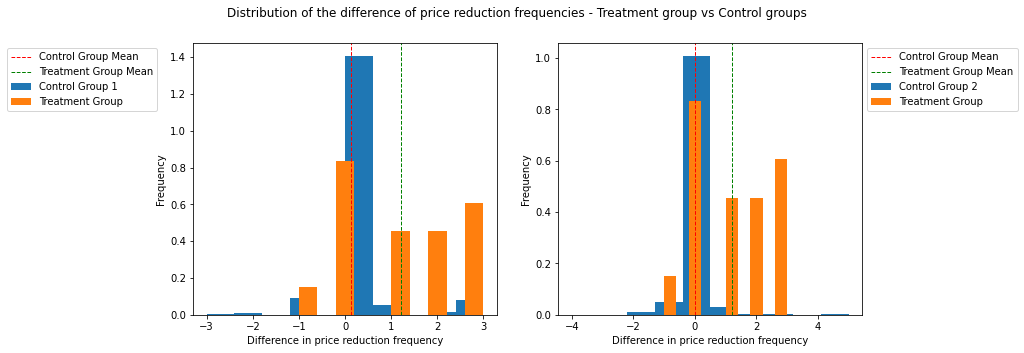

In [15]:
# Calculate the means
mean_treatment = treatment_i['Competitive_Diff_Before_After'].mean()
mean_control1 = other_products_control_i['Competitive_Diff_Before_After'].mean()
mean_control2 = other_times_control_i['Competitive_Diff_Before_After'].mean()
print('The mean of the treatment group is:',mean_treatment)
print('The mean of the first control group is:',mean_control1)
print('The mean of the second control group is:',mean_control2)

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the treatment group vs control group 1
ax1.hist(other_products_control_i['Competitive_Diff_Before_After'], bins=10, alpha=1, density=True, label='Control Group 1')
ax1.hist(treatment_i['Competitive_Diff_Before_After'], bins=10, alpha=1, density=True, label='Treatment Group')
ax1.axvline(mean_control1, color='red', linestyle='dashed', linewidth=1, label='Control Group Mean')
ax1.axvline(mean_treatment, color='green', linestyle='dashed', linewidth=1, label='Treatment Group Mean')
ax1.set_xlabel('Difference in price reduction frequency')
ax1.set_ylabel('Frequency')
ax1.legend(loc='best',bbox_to_anchor=(-0.1, 1))

# Plot the treatment group vs control group 2
ax2.hist(other_times_control_i['Competitive_Diff_Before_After'], bins=10, alpha=1, density=True, label='Control Group 2')
ax2.hist(treatment_i['Competitive_Diff_Before_After'], bins=10, alpha=1, density=True, label='Treatment Group')
ax2.axvline(mean_control2, color='red', linestyle='dashed', linewidth=1, label='Control Group Mean')
ax2.axvline(mean_treatment, color='green', linestyle='dashed', linewidth=1, label='Treatment Group Mean')
ax2.set_xlabel('Difference in price reduction frequency')
ax2.set_ylabel('Frequency')
ax2.legend(loc='best',bbox_to_anchor=(1, 1))

plt.suptitle("Distribution of the difference of price reduction frequencies - Treatment group vs Control groups")
plt.show()

We observe differences in the mean. We will assess it statistically.

### A/B testing

We use A/B testing to determine the effect of a promotional offer on the price changes of a competing store. The goal of the testing is to compare two groups and determine if there is a significant difference in the mean price changes between the two groups. To achieve this, the following tests will be performed:

##### Shapiro-Wilk test

We will perform the Shapiro-Wilk test to check the normality assumption of the data. This is an important assumption to check because certain statistical tests like Student t-test and Welch's t-test rely on the normality of the data. If the data is not normally distributed, we will use Mann-Whitney U test to compare the means of the two groups.

##### Levene's test

We will perform Levene's test to check the homogeneity of variances between the two groups. This test is used to ensure the assumptions of equal variances of the Student t-test. If there is a significant heterogeneity of variances we will use Welch's t-test.

###### <u> Comparing means of two groups </u>
The choice of test depends on the distribution of the data and the equality of variances between the two groups. Based on the results of the last two test we will choose one of the following tests:

#### Welch's t-test

We will use Welch's t-test to compare the means of the two groups when the variances between the groups are not equal. This is important, as there could be variability due to differences in the time or products being evaluated.

#### Student t-test

We will use Student's t-test to compare the means of the two groups. It assumes that the variances of the two groups are equal. If this assumption is not met, the Welch's t-test is a more appropriate alternative.

#### Mann-Whitney U test

We will use Mann-Whitney U test to compare the medians of the two groups. Unlike parametric tests like Student's t-test or Welch's t-test, it is a non-parametric test and is used when the data is not normally distributed.

In [16]:
def AB_testing(treatment_df, control_df):

    mean_difference = np.mean(treatment_df) - np.mean(control_df)

    # Check the normality assumption with Shapiro-Wilk test
    shapiro_treatment = shapiro(treatment_df)
    shapiro_control = shapiro(control_df)

    if (shapiro_treatment[1] < 0.05) & (shapiro_control[1] < 0.05):
        print("By Shapiro-Wilk test, the data is normally distributed")

        # Check the homogeneity of variances assumption with Levene's test
        levene_test = stats.levene(treatment_df, control_df)

        if levene_test[1]< 0.05:
            print("By Levene's test, the data shows significant heterogeneity of variances between the groups")

            # Use Welch's t-test to compare the means of the treatment group and control group
            t_stat, p_value = stats.ttest_ind(treatment_df, control_df, equal_var=False)

            # Compute the confidence interval of the difference of means
            se = np.sqrt(np.var(treatment_df)/len(treatment_df) + np.var(control_df)/len(control_df))
            df = (np.var(treatment_df)/len(treatment_df) + np.var(control_df)/len(control_df))**2 /((np.var(treatment_df)/len(treatment_df))**2 /(len(treatment_df)-1) + (np.var(control_df)/len(control_df))**2 / (len(control_df)-1))
            t_value = stats.t.ppf(1-alpha/2, df=df)
            ci = (mean_difference - t_value * se, mean_difference + t_value * se)

        else:
            print("By Levene's test, the data shows no significant heterogeneity of variances between the groups")

            # Use Student t-test to compare the means of the treatment group and control group
            t_stat, p_value = stats.ttest_ind(treatment_df, control_df, equal_var=True)

            # Compute the confidence interval of the difference of means
            se = np.sqrt(np.var(treatment_df)/len(treatment_df) + np.var(control_df)/len(control_df))
            t_value = stats.t.ppf(1-alpha/2, df=min(len(treatment_df), len(control_df))-1)
            ci = (mean_difference - t_value * se, mean_difference + t_value * se)

    else:
        print("By Shapiro-Wilk test, the data is not normally distributed")

        # Use Mann-Whitney U test to compare the means of the treatment group and control group
        t_stat, p_value = stats.mannwhitneyu(treatment_df, control_df)

        # Compute the confidence interval of the difference of means
        z_value = stats.norm.ppf(1-alpha/2)
        se = np.sqrt(np.var(treatment_df)/len(treatment_df) + np.var(control_df)/len(control_df))
        ci = (mean_difference - z_value * se, mean_difference + z_value * se)

    # Check if the p-values are less than 0.05
    if p_value < 0.05:
        print("By the statistical test, there is a significant difference in price reduction frequency between the treatment group and control group")
    else:
        print("By the statistical test, there is not a significant in price reduction frequency difference between the treatment group and control group")


    if ci[0] > 0:
        print("The treatment group has a higher frequency of price changes compared to control group with a confidence interval of ", ci)
    else:
        print("The control group has a higher or equal frequency of price changes compared to treatment group with a confidence interval of ", ci)
    
    return t_stat, ci

In [17]:
# Use A/B testing procedure to compare the means of the treatment group and each control group
print('Testing frequency of price changes when comparing to other products without price changes at the same time')
t_stat1, conf_int1 = AB_testing(treatment_i['Competitive_Diff_Before_After'], other_products_control_i['Competitive_Diff_Before_After'])
print('\nTesting frequency of price changes when comparing to same products without price changes at different time')
t_stat2, conf_int2 = AB_testing(treatment_i['Competitive_Diff_Before_After'], other_times_control_i['Competitive_Diff_Before_After'])

Testing frequency of price changes when comparing to other products without price changes at the same time
By Shapiro-Wilk test, the data is normally distributed
By Levene's test, the data shows significant heterogeneity of variances between the groups
By the statistical test, there is a significant difference in price reduction frequency between the treatment group and control group
The treatment group has a higher frequency of price changes compared to control group with a confidence interval of  (0.6245333504085773, 1.5507820352072375)

Testing frequency of price changes when comparing to same products without price changes at different time
By Shapiro-Wilk test, the data is normally distributed
By Levene's test, the data shows significant heterogeneity of variances between the groups
By the statistical test, there is a significant difference in price reduction frequency between the treatment group and control group
The treatment group has a higher frequency of price changes compare

##### Confidence interval analysis

We will assess the precision of our sample mean by computing a confidence interval that will gives us a more complete picture of the results.

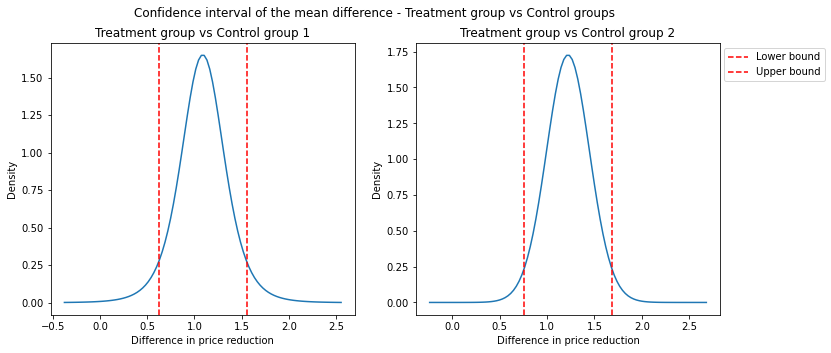

In [ ]:
# Plot the confidence interval
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the treatment group vs control group 1
x1 = np.linspace(conf_int1[0]-1, conf_int1[1]+1, 100)
y1 = stats.t.pdf(x1, df1, loc=mean_treatment-mean_control1, scale=np.sqrt(std_control1**2/n_c1 + std_treatment**2/n_t))
ax1.plot(x1, y1)
ax1.axvline(conf_int1[0], color='red', linestyle='--', label='Lower bound')
ax1.axvline(conf_int1[1], color='red', linestyle='--', label='Upper bound')
ax1.set_xlabel('Difference in price reduction')
ax1.set_ylabel('Density')
ax1.set_title('Treatment group vs Control group 1')

# Plot the treatment group vs control group 2
x2 = np.linspace(conf_int2[0]-1, conf_int2[1]+1, 100)
y2 = stats.t.pdf(x2, df2, loc=mean_treatment-mean_control2, scale=np.sqrt(std_control2**2/n_c2 + std_treatment**2/n_t))
ax2.plot(x2, y2)
ax2.axvline(conf_int2[0], color='red', linestyle='--', label='Lower bound')
ax2.axvline(conf_int2[1], color='red', linestyle='--', label='Upper bound')
ax2.set_xlabel('Difference in price reduction')
ax2.set_ylabel('Density')
ax2.set_title('Treatment group vs Control group 2')
ax2.legend(loc='best',bbox_to_anchor=(1.36, 1))

plt.suptitle("Confidence interval of the mean difference - Treatment group vs Control groups")
plt.show()

The tests we used above ensure a comprehensive evaluation of promotion impact on the price changes of the competing store. By comparing the frequency of price changes in the competitor store before and after the promotion in the first store, we are able to account for differences in time or products being evaluated, and the possibility of unequal variances due to differences in time or products. The results of these tests suggest that the changes observed in the competitor store's price changes are likely due to the promotion in the first store and supported also by a confidence interval above 0.

Based on these results, we can conclude that the promotion in the first store likely had an impact on the price changes in the competitor store.